## In this session, we will read time series data using Pandas, understand how decomposition models work and time series frequency can be modified 

### importing required libraries

In [1]:
import statsmodels

In [2]:
statsmodels.__version__

'0.12.2'

In [3]:
import numpy                      as np
import pandas                     as pd
import matplotlib.pyplot          as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal     import seasonal_decompose, STL
import datetime

# Reading time series

## Example 1

In [4]:
 df1 = pd.read_csv('AirPassenger.csv')

In [5]:
df1.head()

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


checking datatypes

In [6]:
df1.dtypes

Year-Month    object
Pax            int64
dtype: object

Pandas unable to identify Year-Month column as a date object

Using 'parse_dates' input, pandas will be able to identify that the data is time series.

In [7]:
df1 = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month']) 

In [8]:
df1.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Now the time series reference is approprately identified.

It is recommended that we make our time series reference as the index

In [9]:
df1 = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')

In [10]:
df1.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Using time series reference as index, We can conveniently do slicing i.e. obtain data for a specific time period.

In [11]:
df1['1951-04-01':'1952-01-01']

,Pax
Year-Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


We can check values corresponding to a specific time point aswell

In [12]:
df1.loc['1960-05-01']

Pax    472
Name: 1960-05-01 00:00:00, dtype: int64

## Example 2 

In [13]:
df2 = pd.read_csv('Gas.csv')

In [14]:
df2.head()

,Unnamed: 0,x
0,1,1709
1,2,1646
2,3,1794
3,4,1878
4,5,2173


we start collecting data in jan 1956 and total records are 476. frequency is M

Lets drop unwanted columns and add time-stamp to series

In [15]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
df2.head()

,x
0,1709
1,1646
2,1794
3,1878
4,2173


In [17]:
df2.tail()

,x
471,49013
472,56624
473,61739
474,66600
475,60054


In [22]:
date = pd.date_range(start='1/1/1956', periods=476, freq='M')
date

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=476, freq='M')

In [23]:
df2['Time_Stamp'] = pd.DataFrame(date)

In [24]:
df2.head()

,x,Time_Stamp
0,1709,1956-01-31
1,1646,1956-02-29
2,1794,1956-03-31
3,1878,1956-04-30
4,2173,1956-05-31


In [25]:
df2=df2.set_index('Time_Stamp')

In [26]:
df2.head()

,x
Time_Stamp,
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173


## Example 3

In [27]:
df3=pd.read_csv('RetailTurnover.csv')

In [28]:
df3.head() #parse_dates: strings

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [29]:
df3.tail()

,Year,Quarter,Turnover
34,1991,Q1,17115.2
35,1991,Q2,14284.9
36,1991,Q3,14558.8
37,1991,Q4,14914.3
38,1992,Q1,17342.3


data is recorder for the period of 1982 through 1992 on quarterly basis

converting above data into time series

In [30]:
quarters= pd.date_range(start='9/30/1982', end='3/31/1992', freq='Q')

In [31]:
quarters

DatetimeIndex(['1982-09-30', '1982-12-31', '1983-03-31', '1983-06-30',
               '1983-09-30', '1983-12-31', '1984-03-31', '1984-06-30',
               '1984-09-30', '1984-12-31', '1985-03-31', '1985-06-30',
               '1985-09-30', '1985-12-31', '1986-03-31', '1986-06-30',
               '1986-09-30', '1986-12-31', '1987-03-31', '1987-06-30',
               '1987-09-30', '1987-12-31', '1988-03-31', '1988-06-30',
               '1988-09-30', '1988-12-31', '1989-03-31', '1989-06-30',
               '1989-09-30', '1989-12-31', '1990-03-31', '1990-06-30',
               '1990-09-30', '1990-12-31', '1991-03-31', '1991-06-30',
               '1991-09-30', '1991-12-31', '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [32]:
df3['Time_Stamp']=pd.DataFrame(quarters)

In [33]:
df3.head()

,Year,Quarter,Turnover,Time_Stamp
0,1982,Q3,13423.2,1982-09-30
1,1982,Q4,13128.8,1982-12-31
2,1983,Q1,15398.8,1983-03-31
3,1983,Q2,12964.2,1983-06-30
4,1983,Q3,13133.5,1983-09-30


dropping unwanted columns and making time-stamp as index for the series

In [34]:
df3.drop(['Year','Quarter'],axis=1,inplace=True)
df3=df3.set_index('Time_Stamp')

In [35]:
df3.head()

,Turnover
Time_Stamp,
1982-09-30,13423.2
1982-12-31,13128.8
1983-03-31,15398.8
1983-06-30,12964.2
1983-09-30,13133.5


<AxesSubplot:xlabel='Time_Stamp'>

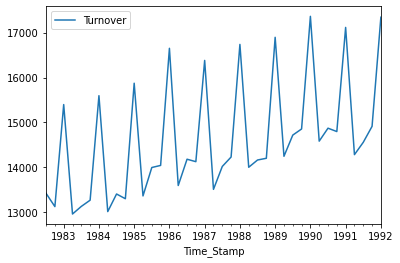

In [36]:
df3.plot()

## Multivariate Time Series

In [37]:
df4= pd.read_csv('Daily_electricity_consumption.csv',)

In [38]:
df4.head()

,date_time,active_power_consumed,meter_reading
0,01-01-2009,0.976869,1.946528
1,02-01-2009,1.616326,8.222917
2,03-01-2009,1.328817,7.249306
3,04-01-2009,1.347218,2.253472
4,05-01-2009,1.113889,6.006944


In [39]:
df4.tail()

,date_time,active_power_consumed,meter_reading
690,22-11-2010,1.417733,7.038889
691,23-11-2010,1.095511,5.285417
692,24-11-2010,1.247394,8.488889
693,25-11-2010,0.993864,3.522222
694,26-11-2010,1.178230,7.908947


In [40]:
date = pd.date_range(start='1/1/2009', end='11/26/2010', freq='D')
date

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', length=695, freq='D')

In [41]:
df4['Time_Stamp'] = pd.DataFrame(date)

In [42]:
df4=df4.set_index('Time_Stamp')

In [43]:
df4=df4.drop('date_time',axis=1)

In [44]:
df4.head()

,active_power_consumed,meter_reading
Time_Stamp,,
2009-01-01,0.976869,1.946528
2009-01-02,1.616326,8.222917
2009-01-03,1.328817,7.249306
2009-01-04,1.347218,2.253472
2009-01-05,1.113889,6.006944


<AxesSubplot:xlabel='Time_Stamp'>

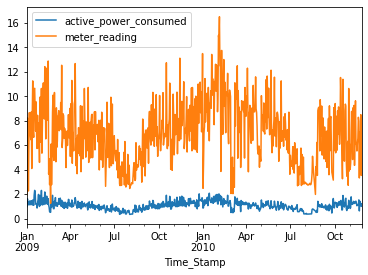

In [45]:
df4.plot()

## Plotting time series

### Plotting Air Passanger time series data

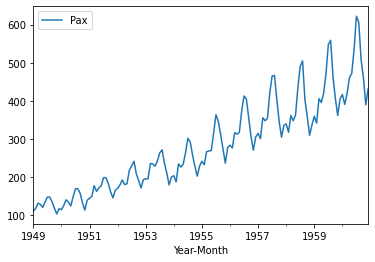

In [46]:
df1.plot()
plt.show()

We can increase the size of the plot

<AxesSubplot:xlabel='Year-Month'>

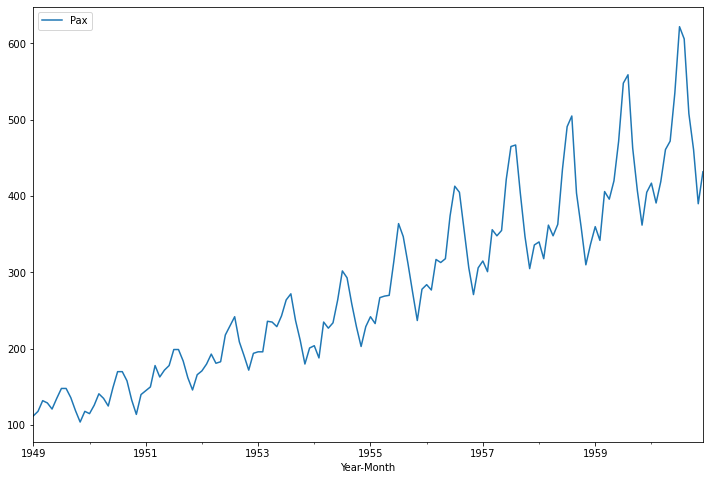

In [47]:
df1.plot(figsize=(12,8))

we can include gridlines to the plot

<AxesSubplot:xlabel='Year-Month'>

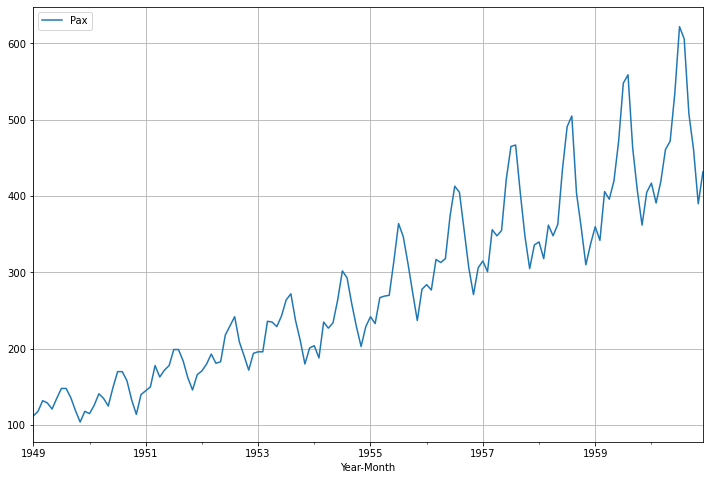

In [48]:
df1.plot(figsize=(12,8),grid=True)

### for multivariate time series

<AxesSubplot:xlabel='Time_Stamp'>

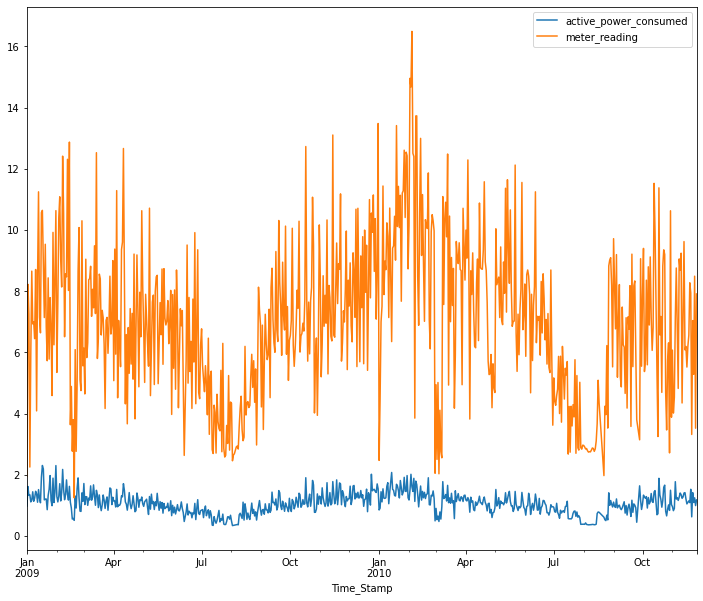

In [49]:
df4.plot(figsize=(12,10))

# Handling missing values 

No missing data is allowed in time series as data is ordered.
It is simply not possible to shift the series to fill in the gaps.

In [50]:
df4=pd.read_csv('Shoe Sales.csv',parse_dates = ['Month'], index_col = 'Month')

In [51]:
df4.head(20)

,No. of Pairs
Month,
2011-01-01,742
2011-02-01,741
2011-03-01,896
2011-04-01,951
2011-05-01,1030
2011-06-01,697
2011-07-01,700
2011-08-01,793
2011-09-01,861


In [52]:
df4.isnull().sum()

No. of Pairs    0
dtype: int64

Let us replace the number of pairs for 2012-May which is 932 as np.NaN.

In [53]:
df4.replace(932, np.NaN, inplace = True)

In [54]:
df4.isnull().sum()

No. of Pairs    1
dtype: int64

#### Time series has one misiing value

<AxesSubplot:xlabel='Month'>

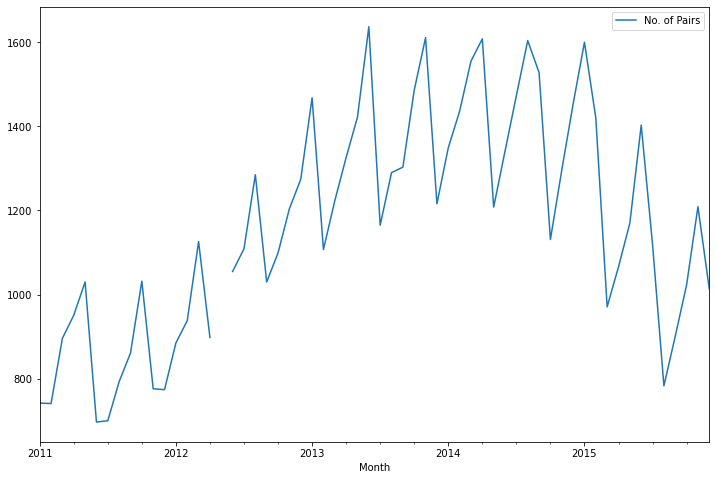

In [55]:
df4.plot(figsize=(12,8))

#### NA value can be replaced using resampling.

In [57]:
##df=df.ffill()  last value is missing
##df=df.bfill()  first value is missing

## imputing using rolling mean, use seasonality as window
df4_rolling = df4.fillna(df4.rolling(12,min_periods=1,center=True).mean())


## imputing using interpolation
df4_imputed= df4.interpolate(method = 'linear')

In [ ]:
df3=df3.interpolate()

<AxesSubplot:xlabel='Month'>

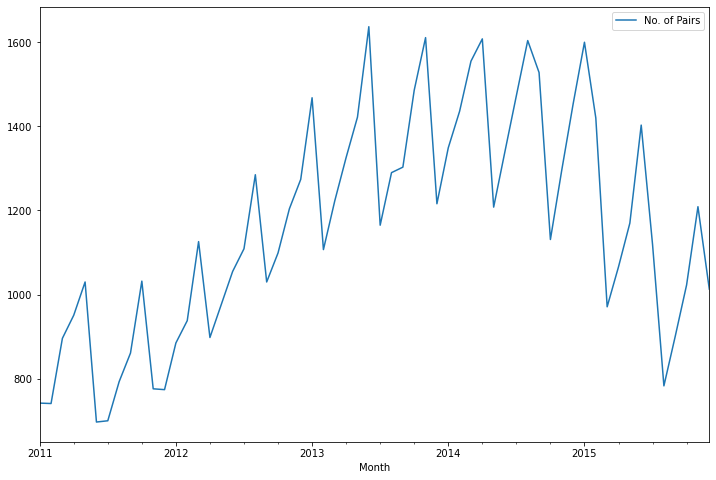

In [58]:
df4_imputed.plot(figsize=(12,8))

<AxesSubplot:xlabel='Month'>

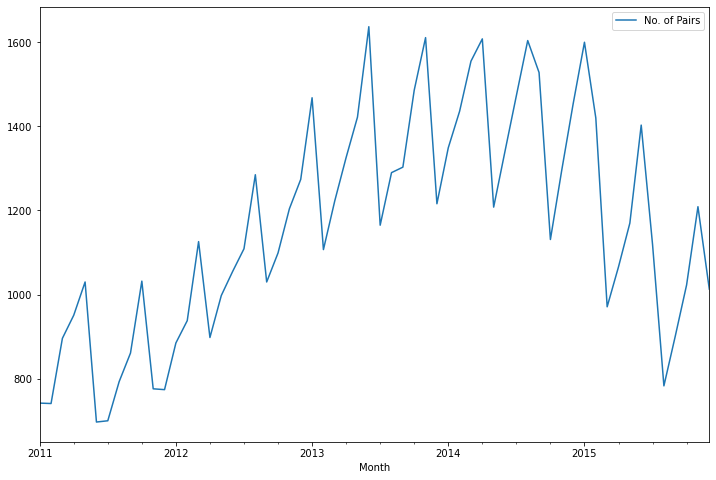

In [59]:
df4_rolling.plot(figsize=(12,8))

In [60]:
df4_imputed.loc['2012-05-01']

No. of Pairs    976.5
Name: 2012-05-01 00:00:00, dtype: float64

number of pairs for 2012-May which was 932 is now replaced by value 976.5

In [61]:
df4_rolling.loc['2012-05-01']

No. of Pairs    997.727273
Name: 2012-05-01 00:00:00, dtype: float64

In [62]:
df4_imputed.isnull().sum()

No. of Pairs    0
dtype: int64

# Modifying time series range 

### Let's change the monthly series to quarterly.

In [64]:
df1.head(10)

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [65]:
df1_q = df1.resample('Q').sum()

In [66]:
df1_q.head()

,Pax
Year-Month,
1949-03-31,362
1949-06-30,385
1949-09-30,432
1949-12-31,341
1950-03-31,382


<AxesSubplot:xlabel='Year-Month'>

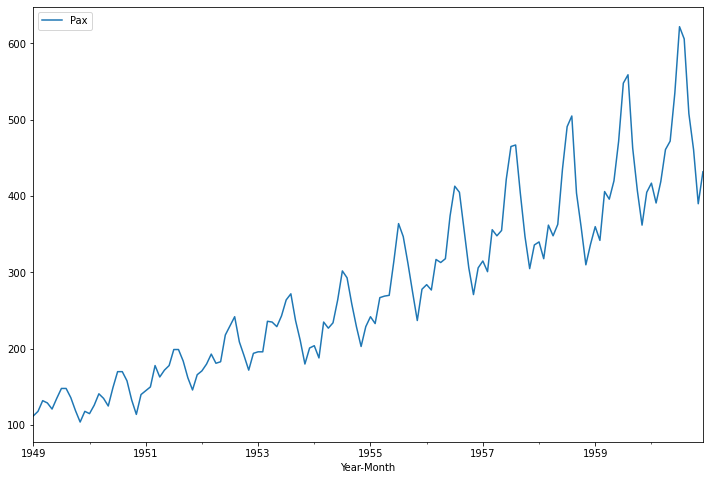

In [67]:
df1.plot(figsize=(12,8))

<AxesSubplot:xlabel='Year-Month'>

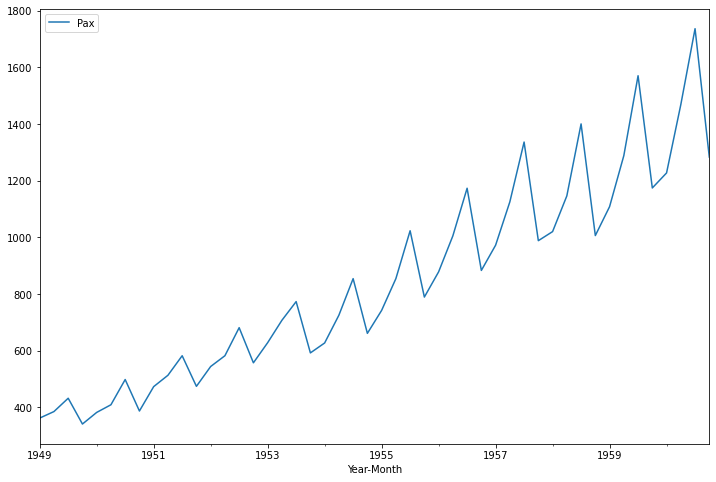

In [68]:
df1_q.plot(figsize=(12,8))

<AxesSubplot:xlabel='Year-Month'>

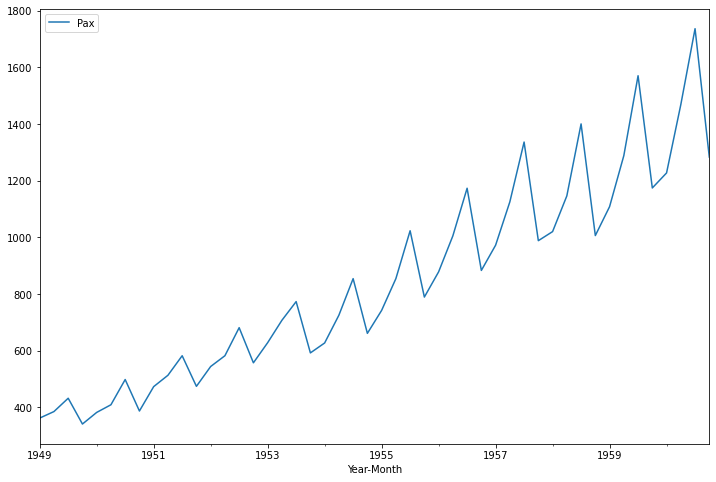

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1_q.plot()

# Decomposition of time series

In [70]:
df_temp=pd.read_csv('AirTemp.csv')

In [71]:
df_temp.head()

,Year,Month,AvgTemp
0,1920,Jan,40.6
1,1920,Feb,40.8
2,1920,Mar,44.4
3,1920,Apr,46.7
4,1920,May,54.1


In [72]:
df_temp.tail()

,Year,Month,AvgTemp
235,1939,Aug,61.8
236,1939,Sep,58.2
237,1939,Oct,46.7
238,1939,Nov,46.6
239,1939,Dec,37.8


In [73]:
date=  pd.date_range(start='1/1/1920', end='12/31/1939', freq='M')
df_temp['TimeIndex'] = pd.DataFrame(date)
df_temp.drop(['Year','Month'],axis=1,inplace=True)
df_temp.set_index('TimeIndex',inplace=True)
df_temp.head()

,AvgTemp
TimeIndex,
1920-01-31,40.6
1920-02-29,40.8
1920-03-31,44.4
1920-04-30,46.7
1920-05-31,54.1


<AxesSubplot:xlabel='TimeIndex'>

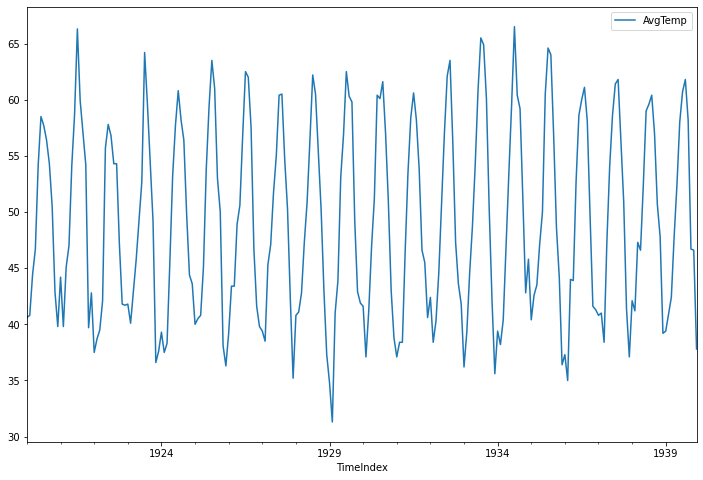

In [74]:
df_temp.plot()

In [75]:
decomposition = seasonal_decompose(df_temp, model = 'additive')

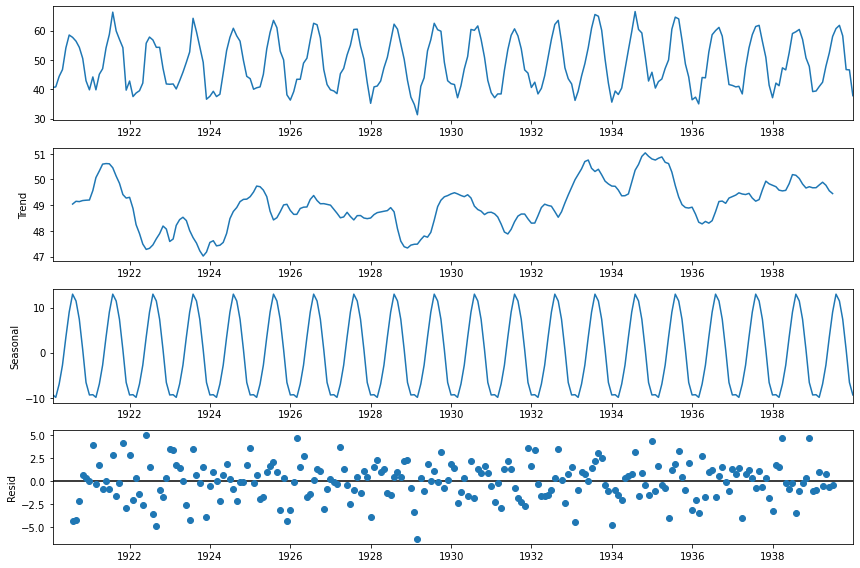

In [76]:
decomposition.plot()
plt.show()

In [77]:
seasonal, trend, resid = decomposition.seasonal, decomposition.trend,decomposition.resid

In [81]:
trend[6]

49.04166666666667

In [82]:
seasonal[6]

12.965460526315788

In [83]:
resid[6]

-4.307127192982456

In [84]:
49.04166666666667+12.965460526315788+-4.307127192982456 #y=t+s+e

57.7

In [85]:
df_temp.head(7)

,AvgTemp
TimeIndex,
1920-01-31,40.6
1920-02-29,40.8
1920-03-31,44.4
1920-04-30,46.7
1920-05-31,54.1
1920-06-30,58.5
1920-07-31,57.7


In [86]:
s = pd.Series(seasonal) 
s

TimeIndex
1920-01-31    -9.320066
1920-02-29    -9.901645
1920-03-31    -6.948355
1920-04-30    -2.759101
1920-05-31     3.451645
                ...    
1939-08-31    11.457346
1939-09-30     7.393092
1939-10-31     0.652961
1939-11-30    -6.603618
1939-12-31    -9.372478
Name: seasonal, Length: 240, dtype: float64

In [87]:
s = s.to_frame()

In [88]:
s.head(20)

,seasonal
TimeIndex,
1920-01-31,-9.320066
1920-02-29,-9.901645
1920-03-31,-6.948355
1920-04-30,-2.759101
1920-05-31,3.451645
1920-06-30,8.984759
1920-07-31,12.965461
1920-08-31,11.457346
1920-09-30,7.393092


In [89]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
yearly_sales_across_years = pd.pivot_table(s,columns = s.index.year,index = s.index.month_name())
monthly_sales_across_years = yearly_sales_across_years.reindex(index = months)
monthly_sales_across_years

seasonal                                                         \
TimeIndex       1920       1921       1922       1923       1924       1925   
TimeIndex                                                                     
January    -9.320066  -9.320066  -9.320066  -9.320066  -9.320066  -9.320066   
February   -9.901645  -9.901645  -9.901645  -9.901645  -9.901645  -9.901645   
March      -6.948355  -6.948355  -6.948355  -6.948355  -6.948355  -6.948355   
April      -2.759101  -2.759101  -2.759101  -2.759101  -2.759101  -2.759101   
May         3.451645   3.451645   3.451645   3.451645   3.451645   3.451645   
June        8.984759   8.984759   8.984759   8.984759   8.984759   8.984759   
July       12.965461  12.965461  12.965461  12.965461  12.965461  12.965461   
August     11.457346  11.457346  11.457346  11.457346  11.457346  11.457346   
September   7.393092   7.393092   7.393092   7.393092   7.393092   7.393092   
October     0.652961   0.652961   0.652961   0.652961   0.652961   0.652961   
November   -6.603618  -6.603618  -6.603618  -6.603618  -6.603618  -6.603618   
December   -9.372478  -9.372478  -9.372478  -9.372478  -9.372478  -9.372478   

                                                                             \
TimeIndex       1926       1927       1928       1929       1930       1931   
TimeIndex                                                                     
January    -9.320066  -9.320066  -9.320066  -9.320066  -9.320066  -9.320066   
February   -9.901645  -9.901645  -9.901645  -9.901645  -9.901645  -9.901645   
March      -6.948355  -6.948355  -6.948355  -6.948355  -6.948355  -6.948355   
April      -2.759101  -2.759101  -2.759101  -2.759101  -2.759101  -2.759101   
May         3.451645   3.451645   3.451645   3.451645   3.451645   3.451645   
June        8.984759   8.984759   8.984759   8.984759   8.984759   8.984759   
July       12.965461  12.965461  12.965461  12.965461  12.965461  12.965461   
August     11.457346  11.457346  11.457346  11.457346  11.457346  11.457346   
September   7.393092   7.393092   7.393092   7.393092   7.393092   7.393092   
October     0.652961   0.652961   0.652961   0.652961   0.652961   0.652961   
November   -6.603618  -6.603618  -6.603618  -6.603618  -6.603618  -6.603618   
December   -9.372478  -9.372478  -9.372478  -9.372478  -9.372478  -9.372478   

                                                                             \
TimeIndex       1932       1933       1934       1935       1936       1937   
TimeIndex                                                                     
January    -9.320066  -9.320066  -9.320066  -9.320066  -9.320066  -9.320066   
February   -9.901645  -9.901645  -9.901645  -9.901645  -9.901645  -9.901645   
March      -6.948355  -6.948355  -6.948355  -6.948355  -6.948355  -6.948355   
April      -2.759101  -2.759101  -2.759101  -2.759101  -2.759101  -2.759101   
May         3.451645   3.451645   3.451645   3.451645   3.451645   3.451645   
June        8.984759   8.984759   8.984759   8.984759   8.984759   8.984759   
July       12.965461  12.965461  12.965461  12.965461  12.965461  12.965461   
August     11.457346  11.457346  11.457346  11.457346  11.457346  11.457346   
September   7.393092   7.393092   7.393092   7.393092   7.393092   7.393092   
October     0.652961   0.652961   0.652961   0.652961   0.652961   0.652961   
November   -6.603618  -6.603618  -6.603618  -6.603618  -6.603618  -6.603618   
December   -9.372478  -9.372478  -9.372478  -9.372478  -9.372478  -9.372478   

                                 
TimeIndex       1938       1939  
TimeIndex                        
January    -9.320066  -9.320066  
February   -9.901645  -9.901645  
March      -6.948355  -6.948355  
April      -2.759101  -2.759101  
May         3.451645   3.451645  
June        8.984759   8.984759  
July       12.965461  12.965461  
August     11.457346  11.457346  
September   7.393092   7.393092  
October     0.652961   0.652961  
November   -

In [90]:
monthly_sales_across_years["sum"] = monthly_sales_across_years.sum(axis=1)
monthly_sales_across_years=monthly_sales_across_years['sum']

<AxesSubplot:xlabel='TimeIndex'>

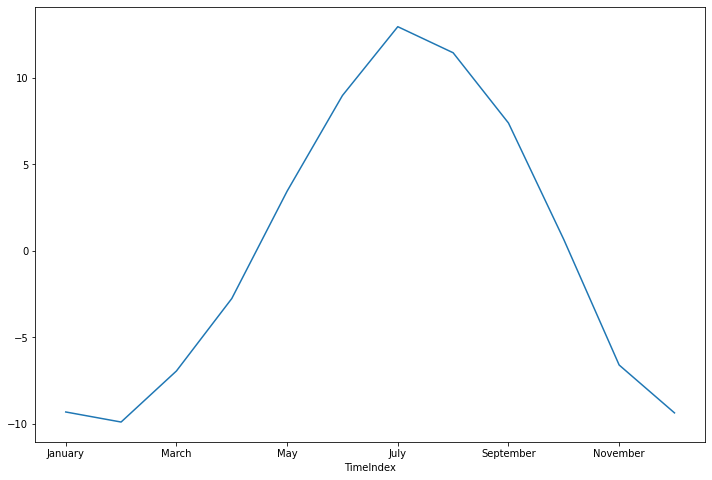

In [91]:
(monthly_sales_across_years/20).plot()

### Retail store data

<AxesSubplot:xlabel='Time_Stamp'>

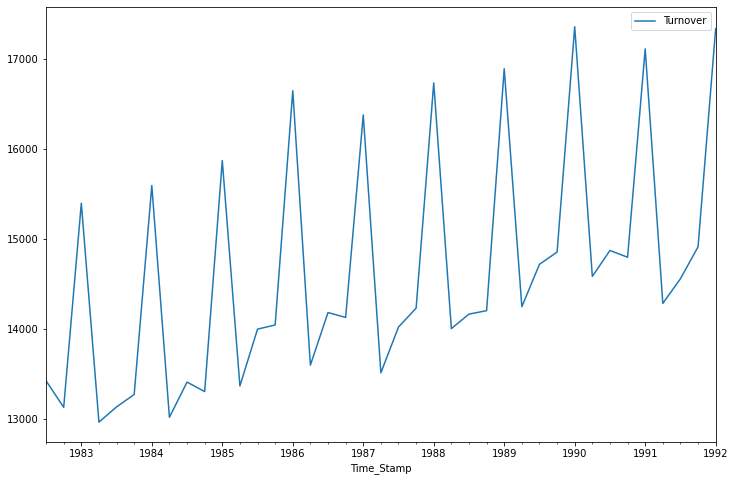

In [92]:
df3.plot()

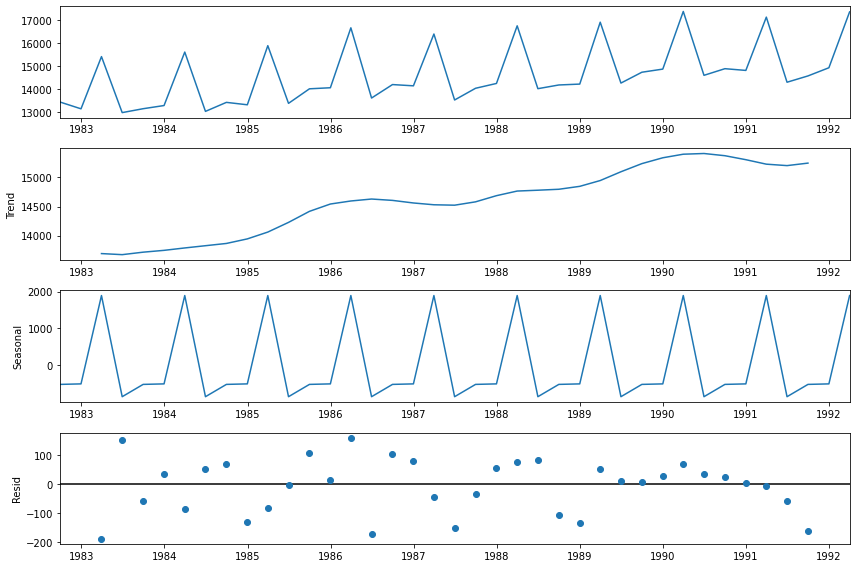

In [93]:
decomposition = seasonal_decompose(df3,model='additive')
decomposition.plot();

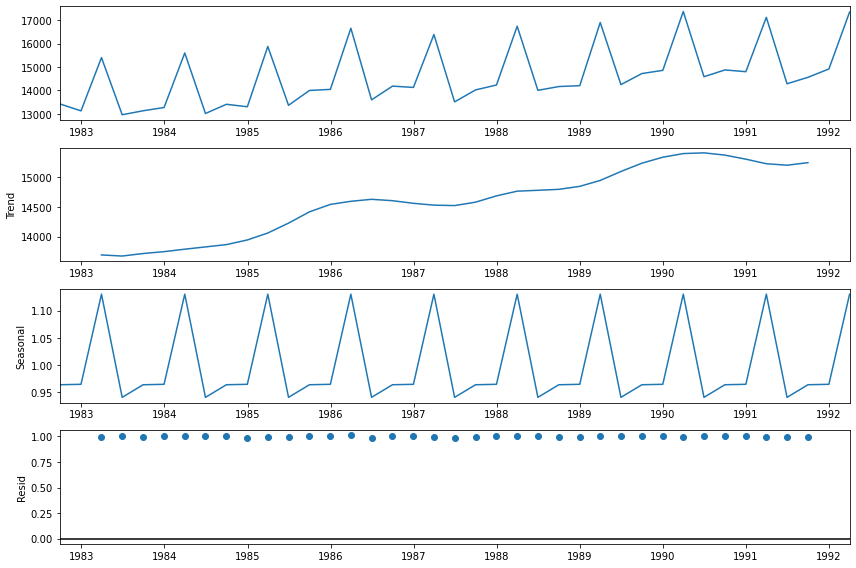

In [94]:
decomposition = seasonal_decompose(df3,model='multiplicative')
decomposition.plot();

### Air Passanger data

<AxesSubplot:xlabel='Year-Month'>

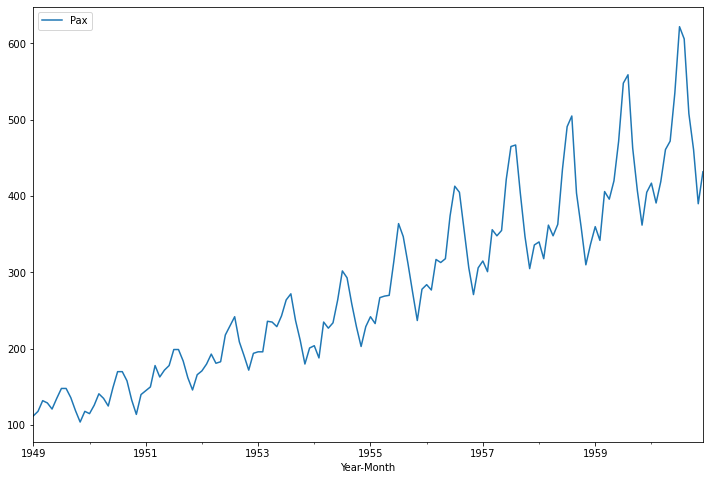

In [95]:
df1.plot()

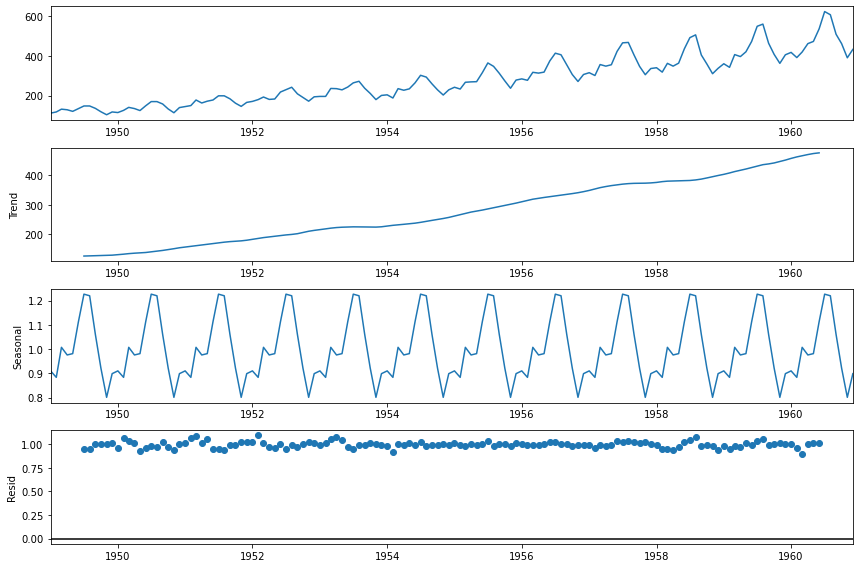

In [97]:
decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

### Decomposition by Loess

In [ ]:
decomposition = STL(df1).fit()
decomposition.plot();

In [ ]:
decomposition = STL(np.log10(df1)).fit()
decomposition.plot();

## decomposition for anomaly detection

In [ ]:
data = pd.read_csv('anomaly_data.csv',parse_dates=['Time_Stamp'],index_col='Time_Stamp')

In [ ]:
data.head()

In [ ]:
data.plot()

In [ ]:
decomposition = STL(data).fit()
decomposition.plot();

In [ ]:
seasonal, trend, resid = decomposition.seasonal, decomposition.trend,decomposition.resid

In [ ]:
data['anamoly']=trend+seasonal-resid

In [ ]:
data.plot(figsize=(12,8))

## Moving Average

In [ ]:
df5=pd.read_csv('Stock.csv', parse_dates = ['TimeStamp'], index_col = 'TimeStamp',dayfirst=True)

In [ ]:
df5

In [ ]:
df5.plot()

In [ ]:
decomposition = seasonal_decompose(df5,model='additive')
decomposition.plot();

In [ ]:
#plt.plot(df5, label='closing price')
plt.plot(df5.rolling(6,center=False).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()

In [ ]:
#plt.plot(df5, label='closing price')
plt.plot(df5.rolling(60).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()

In [ ]:
decomp=STL(df5).fit()

In [ ]:
decomp.plot();